In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [24]:
# load dataset
data = load_boston()
features = data.feature_names
print(features)
df = pd.DataFrame(data=data.data, columns=features)
df['MEDV'] = data.target
display(df)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [25]:
# find correlation between columns
corr = df.corr()
# make values absolute and sort
corr = abs(corr.sort_values(by=['MEDV'], ascending=False))

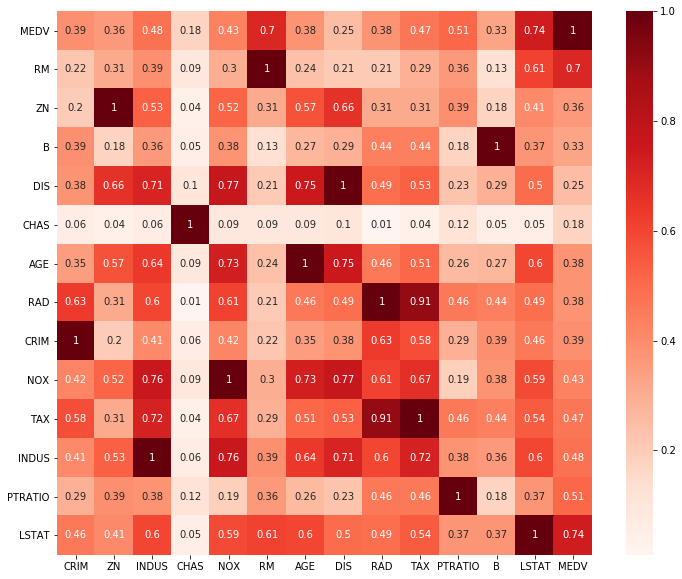

In [26]:
# plot corr
plt.figure(figsize=(12,10))
sns.heatmap(corr.round(2), annot=True, cmap=plt.cm.Reds)
plt.show()

In [27]:
# correlation target
corr_target = corr['MEDV']

In [28]:
# select highly correlated features
relevant_features = corr_target[corr_target > 0.5]
print(relevant_features)

# result:
# RM - average number of rooms per dwelling ~ 69%
# PTRATIO - pupil-teacher ratio by town ~ 50%
# LSTAT - lower status of the population ~ 73%

MEDV       1.000000
RM         0.695360
PTRATIO    0.507787
LSTAT      0.737663
Name: MEDV, dtype: float64


In [29]:
# data predictors
prediction_columns = ['RM', 'LSTAT', 'PTRATIO']
X = pd.DataFrame(data=df, columns=prediction_columns)
display(X)

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7
...,...,...,...
501,6.593,9.67,21.0
502,6.120,9.08,21.0
503,6.976,5.64,21.0
504,6.794,6.48,21.0


In [30]:
# data response
response_column = ['MEDV']
y = pd.DataFrame(data=df, columns=response_column)
display(y)

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [31]:
# split data into train and test (25% test data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [32]:
# training the model
model = LinearRegression().fit(X_train, y_train)

In [34]:
# model evaluation for training set
y_pred_train = model.predict(X_train)

# root mean square error - measures the difference between values predicted by a model and their actual values
rmse = (np.sqrt(mean_squared_error(y_train, y_pred_train)))

# r squared - measures of how close the data pairs in a set are to their fitted regression line
r2 = r2_score(y_train, y_pred_train)

In [35]:
print('The model performance for training set')
print('######################################')
print(f'RMSE is {rmse}')
print(f'R2 score is {r2}')
print('######################################')

The model performance for training set
######################################
RMSE is 5.261096348552611
R2 score is 0.6574598330540663
######################################


In [36]:
# model evaluation for testing set
y_pred_test = model.predict(X_test)

# RMSE
rmse_test= (np.sqrt(mean_squared_error(y_test, y_pred_test)))

# r squared
r2_test = r2_score(y_test, y_pred_test)

In [37]:
print('The model performance for testing set')
print('######################################')
print(f'RMSE is {rmse_test}')
print(f'R2 score is {r2_test}')
print('######################################')

The model performance for testing set
######################################
RMSE is 5.098547794062758
R2 score is 0.7264030689208028
######################################


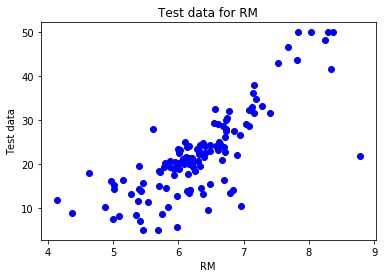

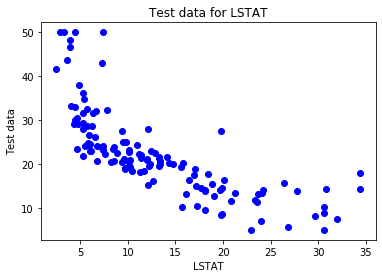

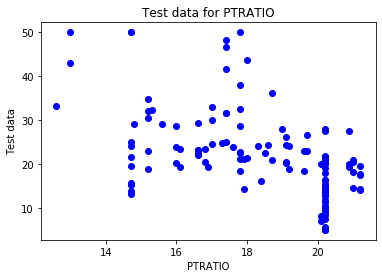

In [39]:
# test data ouput
for i in X_test:
    plt.scatter(X_test[i], y_test, color='blue')
    plt.title(f'Test data for {i}')
    plt.xlabel(f'{i}')
    plt.ylabel('Test data')
    plt.show()

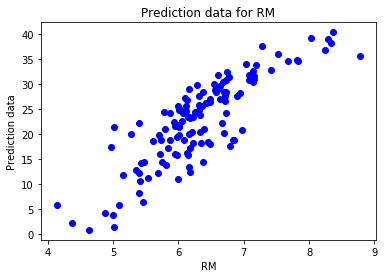

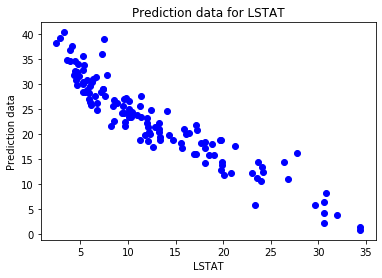

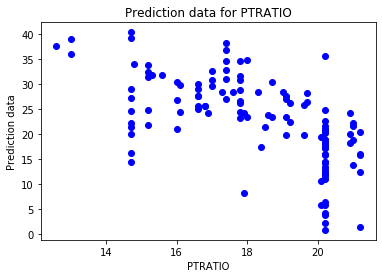

In [41]:
# prediction data ouput
for i in X_test:
    plt.scatter(X_test[i], y_pred_test, color='blue')
    plt.title(f'Prediction data for {i}')
    plt.xlabel(f'{i}')
    plt.ylabel('Prediction data')
    plt.show()